### Importing libraries and Exploring the Dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import openpyxl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import sklearn.model_selection as model_selection

In [3]:
file_path = 'Personal Bank Loan Classification.xlsx'
wb = openpyxl.load_workbook(file_path)
sheet = wb.active
data = []
for row in sheet.iter_rows(values_only=True):
    data.append(row)
df = pd.DataFrame(data[1:], columns=data[0])



### Definining Exploratory Data Analysis with an overview of the whole project

In [4]:
df.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIP Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64


In [5]:
df.head(30)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
df.shape

(5000, 14)

In [7]:
df.duplicated

<bound method DataFrame.duplicated of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]>

In [8]:
columns_to_drop = ['ID', 'ZIP Code']
df = df.drop(columns=columns_to_drop)


###Checking missing values and Outliers & Creating visual methods to analyze the data.

In [9]:
df.isnull().sum()

,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0
CD Account,0


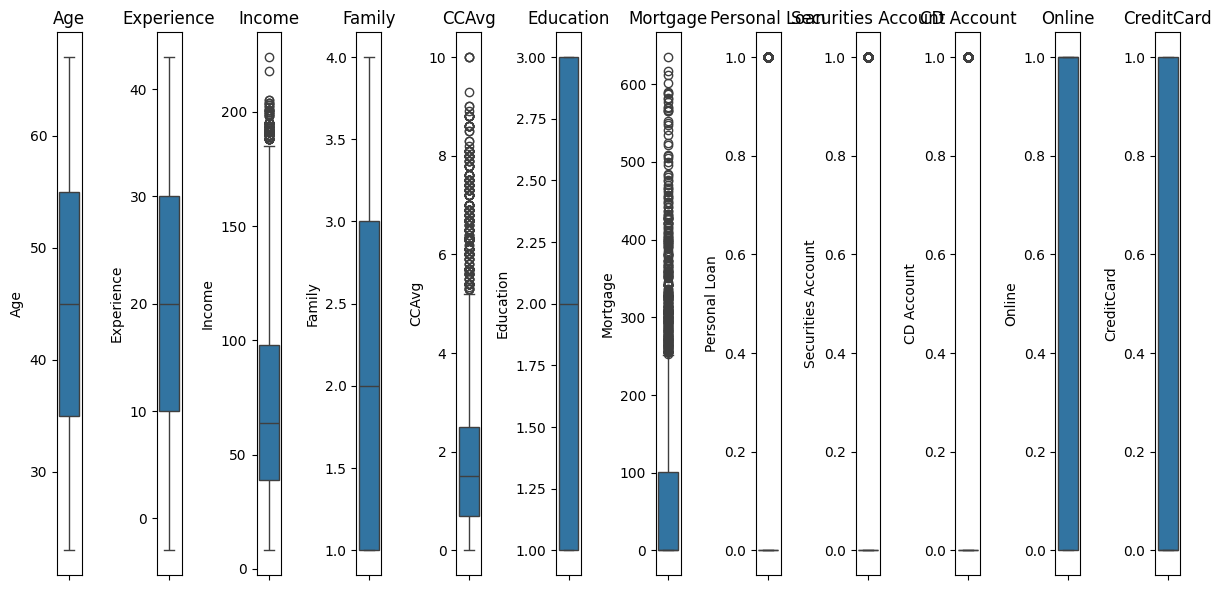

In [10]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for column in numeric_columns:
    plt.subplot(1, len(numeric_columns), list(numeric_columns).index(column) + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [11]:
df.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [12]:
df.corr().style.background_gradient(cmap='Blues')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


###creat a model that fits the data

In [13]:
X = df.iloc[:,2:7]
y = df['Personal Loan']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy on training data: 0.98325
Accuracy on test data: 0.989


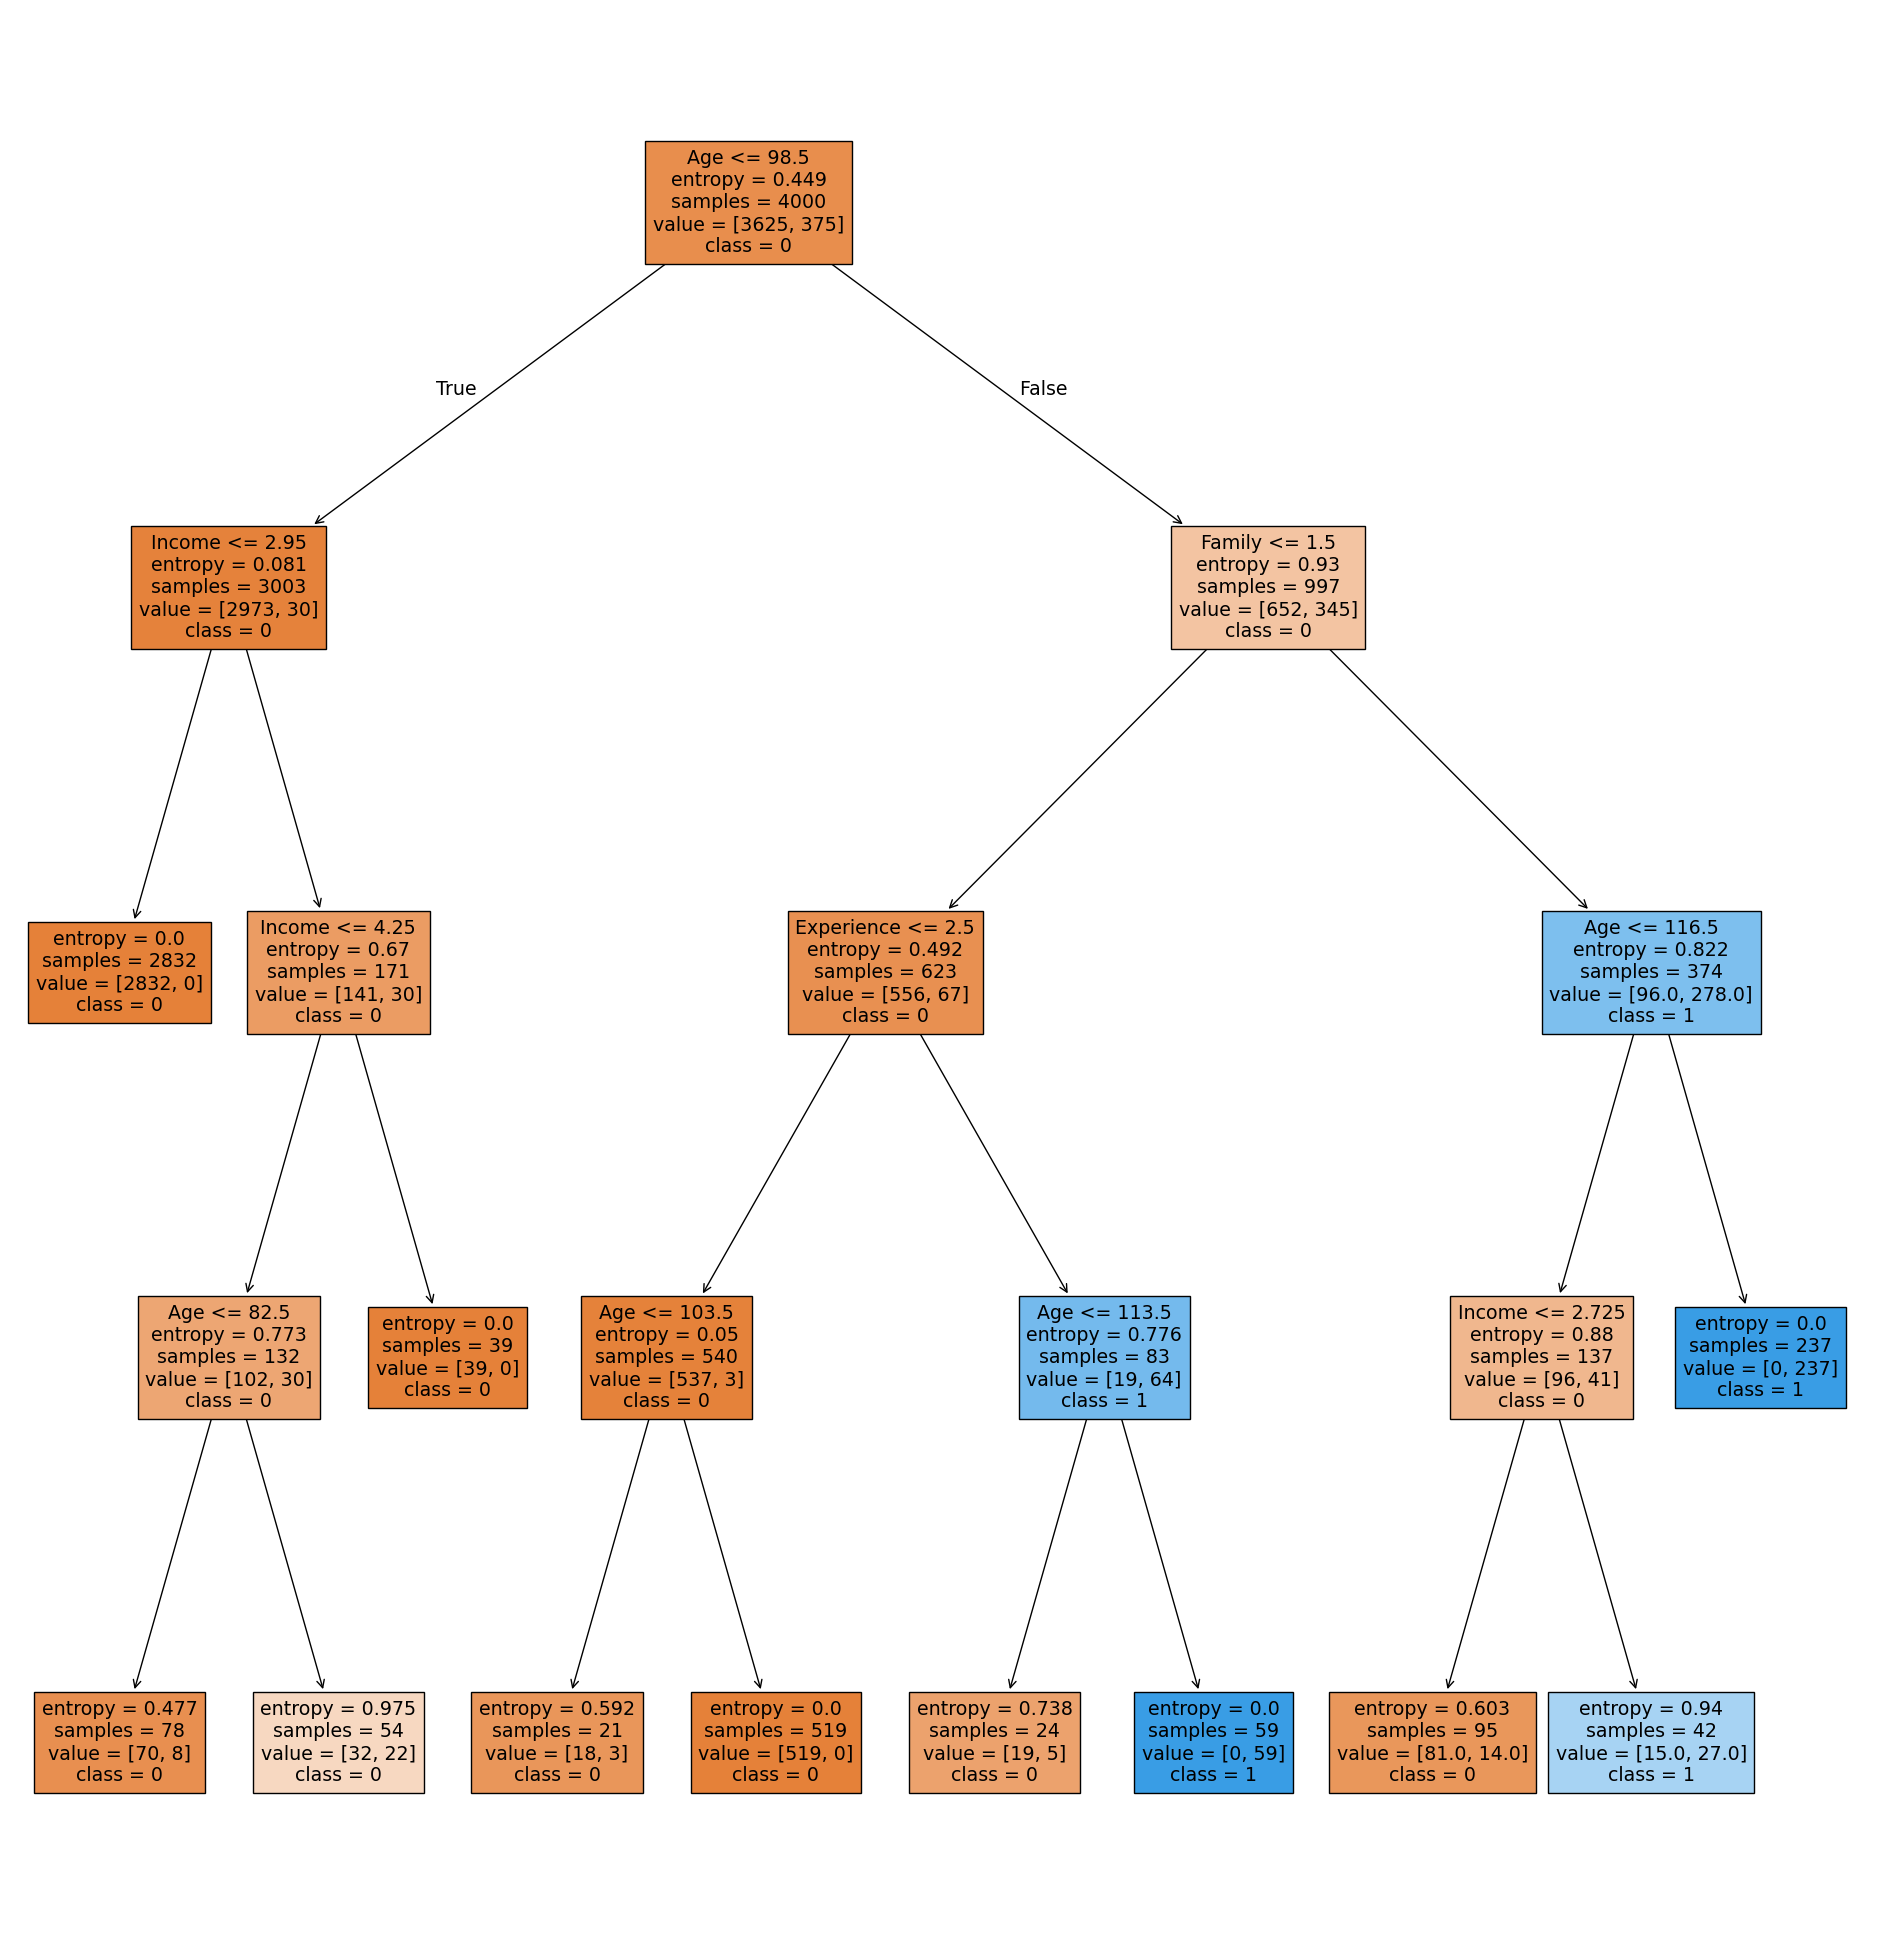

In [15]:
#Checking if the model is underfitting or overfitting
clf_11 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf_11 = clf_11.fit(X_train,y_train)
y_pred = clf_11.predict(X_train) #accuracy on training data
print("Accuracy on training data:",metrics.accuracy_score(y_train, y_pred))
y_pred = clf_11.predict(X_test)  #accuracy on  test data
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(24,25)) # plot tree
_ = tree.plot_tree(clf_11, feature_names=df.columns, class_names =['0','1'], filled=True)

In [16]:
X_train_new, X_val, y_train_new, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1, random_state=4)
max_depth_range = range(1, 16)
val_results = []
train_results = []
for k in max_depth_range:
    clf_2 = DecisionTreeClassifier(max_depth=k)
    clf_2 = clf_2.fit(X_train_new, y_train_new)
    #accuracy on training
    pred_train_new = clf_2.predict(X_train_new)
    train_score = metrics.accuracy_score(y_train_new, pred_train_new)
    train_results.append(train_score)
    #accuracy on validation data
    pred_val = clf_2.predict(X_val)
    val_score = metrics.accuracy_score(y_val, pred_val)
    val_results.append(val_score)

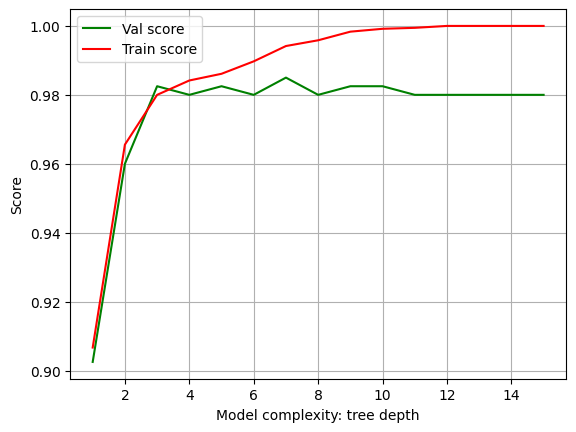

In [17]:
#plot the score curves on both validation and test datasets
plt.plot(max_depth_range, val_results, 'g-', label='Val score')
plt.plot(max_depth_range, train_results, 'r-', label='Train score')
plt.ylabel('Score')
plt.xlabel('Model complexity: tree depth')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test_scaled)


In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



In [22]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9510
Confusion Matrix:
[[884  11]
 [ 38  67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.64      0.73       105

    accuracy                           0.95      1000
   macro avg       0.91      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000



In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'K-Nearest Neighbors Accuracy: {accuracy:.4f}')

K-Nearest Neighbors Accuracy: 0.9820


In [24]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

y_pred_rounded = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_rounded)
print(f'Polynomial Regression Accuracy: {accuracy:.4f}')

Polynomial Regression Accuracy: 0.9620




###creating an accurecy table

In [25]:
models = ['Decision Tree', 'Polynomial Regression', 'K-Nearest Neighbors']
accuracies = [val_results[-1], accuracy, accuracy]

accuracy_table = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

print("Accuracy Table:")
print(accuracy_table)

Accuracy Table:
                   Model  Accuracy
0          Decision Tree     0.980
1  Polynomial Regression     0.962
2    K-Nearest Neighbors     0.962
